# Assignment 2_GROUP 2

## 1.5 MSE

#### Suppose that $y = f(X) + u$ for some unknown but continuous function $f$. Suppose we want to use observed data on $X$ to predict outcomes $y$, and seek a predictor $\hat{y}(X)$ which is "best" in the sense that the (expected) mean squared prediction error $\mathbb{E} [(y - \hat{y}(X))^2 | X]$ is minimized.  What can we say about $\hat{y}$ and its relation to the conditional expectation $\mathbb{E}(y | X)$?  Its relation to $u$??


- $\hat{y}(X)$  is equal to   $\mathbb{E} [y | X] $


$\mathbb{E} [(y - \hat{y}(X))^2 | X]$ = $\mathbb{E} [(y^2 - 2y\hat{y}(X) + \hat{y}(X)^2 )| X]$

Taking the derivative with respect to $\hat{y}(X)$

$-2\mathbb{E}  [y | X] + 2\hat{y}(X) = 0 $ -->  $\mathbb{E} [y | X] = \hat{y}(X) $

Therefore the optimal predictor that minimizes the (expected) mean squared prediction error is the conditional expectation of $y$ given $X$.

$y = f(X) + u$ 

- relation to $u$ 

The error term u is ideally supposed to be independent of X, meaning E(u∣X)=0. This ensures that the optimal predictor (X) does not need to adjust for any systematic bias in u that is related to X.





### Optimal Predictor $\hat{y}(X)$
- **Mean Squared Prediction Error**: The MSE for a predictor $\hat{y}(X) $ is defined as:
  $\text{MSE} = E[(y - \hat{y}(X))^2 | X] $
  We aim to minimize this MSE.

- **Expanding the MSE**: Expand the squared term:
  $[(y - \hat{y}(X))^2 = (f(X) + u - \hat{y}(X))^2\$

Since $y = f(X) + u $, 
we see the deviation of the predictor from both the deterministic part $ f(X)$ and the stochastic component $u$.

- **Optimal Condition**: To minimize the MSE, consider the expectation:
  $E[(y - \hat{y}(X))^2 | X] = E[(f(X) + u - \hat{y}(X))^2 | X]$

Deriving with respect to $\hat{y}(X)$ and setting the derivative to zero gives us the condition for the optimal $\hat{y}(X) :\frac{\partial}{\partial \hat{y}(X)} E[(f(X) + u - \hat{y}(X))^2 | X] = 0$

This yields $\hat{y}(X) = E[f(X) + u | X] = \mathbb{E} [y | X]$ since $E[u|X] = 0 $ if $u$ is uncorrelated with $ X $

### Relation to $\mathbb{E} [y | X] $

- $ \hat{y}(X) =\mathbb{E} [y | X] $ is the best predictor of \( y \) given $X $ in terms of minimizing the MSE.

### Relation to $ u $
- **Uncorrelated Error**: The error term $ u $ is independent of $X $, meaning $ E(u|X) = 0$. This ensures that the optimal predictor $\hat{y}(X)$ does not need to adjust for any systematic bias in $u$ that is related to $X $.


In summary, the optimal predictor $ \hat{y}(X)$ in terms of MSE minimization equals  $\mathbb{E}(y | X)$,  assuming that $ u $ is independent of $ X $ --> $ E(u|X) = 0$

## 3. “Plausibly Exogenous”

### 3.1 IV Assumptions


#### How it works; 

Initially we have an indogeneity Problem

In the regression model `y = Xβ + u`, if `X` is correlated with `u`, then `E(X^Tu) ≠ 0`. Consequently, using OLS leads to biased estimates:

 $\hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty = β + (X^TX)^{-1}X^Tu$

This indicates that $\hat{\beta}_{OLS}$ also has the term $(X^TX)^{-1}X^Tu$, reflecting the correlation between X and u, and leading to potential bias.

To solve this we use an instrumental Variable $Z$

$\hat{\beta}_{IV} = (Z^TX)^{-1}Z^Ty$

We first Estimate the predicted values $\hat{X}$, using the projection of $X$ on $Z$, This step essentially purges X of the influences correlated with u, using Z as the source of exogenous variation.

$\hat{X} = Z(Z^TZ)^{-1}Z^TX$

And then we regress $y$ on the predicted values $\hat{X}$ to obtain $\hat{β}_{IV}$, 

$\hat{\beta}_{IV} = (\hat{X}^T\hat{X})^{-1}\hat{X}^Ty$


#### Assumptions: 

The instrument $Z$ must satisfy 2 key assumptions

- Relevance: $Z$ must be correllated with $X$. ($Z^TX ≠ 0$)
- Exogeneity: $Z$ must be uncorrelated with the error term u. ($E(Z^Tu) = 0 $)
- Exclusion Restriction: Z should affect y only through X and not directly. This assumption is crucial and often difficult to test directly.

- Instrument Strength: Weak instruments can lead to poor estimates 
- Homoscedasticity and Other Statistical Properties: While not always necessary, assumptions regarding the distribution of error terms, such as homoscedasticity, can influence the efficiency and robustness of IV estimates.

### 3.2 Conley et al.

Gamma: 0.00, Estimated Beta: 0.98, Estimated Gamma: 0.03
Gamma: 0.10, Estimated Beta: 1.02, Estimated Gamma: 0.12
Gamma: 0.20, Estimated Beta: 1.00, Estimated Gamma: 0.17
Gamma: 0.30, Estimated Beta: 1.02, Estimated Gamma: 0.29
Gamma: 0.40, Estimated Beta: 1.06, Estimated Gamma: 0.32
Gamma: 0.50, Estimated Beta: 1.04, Estimated Gamma: 0.52
Gamma: 0.60, Estimated Beta: 1.03, Estimated Gamma: 0.59
Gamma: 0.70, Estimated Beta: 1.04, Estimated Gamma: 0.69
Gamma: 0.80, Estimated Beta: 1.00, Estimated Gamma: 0.77
Gamma: 0.90, Estimated Beta: 0.97, Estimated Gamma: 0.93
Gamma: 1.00, Estimated Beta: 0.91, Estimated Gamma: 0.99


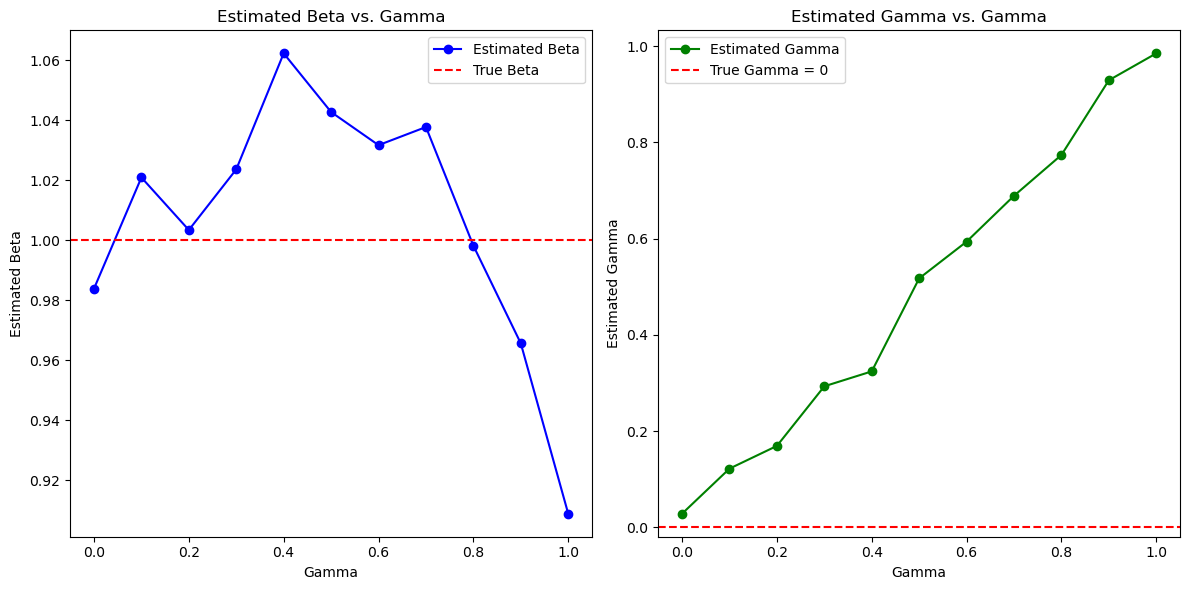

In [45]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import distributions as iid
def linear_dgp(n, beta, gamma, sigma_u=1, rho=0.5):
    """
    Generates data for the model y = Xβ + Zγ + u.
    - n: Number of observations
    - beta: Coefficient for X
    - gamma: Coefficient for Z
    - sigma_u: Standard deviation of the error term
    - rho: Correlation between X and Z
    """
    X = np.random.normal(0, 1, n)
    Z = rho * X + np.sqrt(1 - rho**2) * np.random.normal(0, 1, n)
    u = np.random.normal(0, sigma_u, n)
    y = X * beta + Z * gamma + u
    return y, X, Z

def estimate_ols(y, X, Z):
    """
    Estimates the OLS of the model y = Xβ + Zγ.
    """
    predictors = sm.add_constant(np.column_stack((X, Z)))
    model = sm.OLS(y, predictors).fit()
    return model.params  # Returns estimates of β and γ

# Simulation settings
n = 1000
beta = 1
gammas = np.linspace(0, 1, 11)  # Values of γ to test

# Arrays to store the results
estimated_betas = []
estimated_gammas = []

# Conduct the simulation
for gamma in gammas:
    y, X, Z = linear_dgp(n, beta, gamma)
    estimated_params = estimate_ols(y, X, Z)
    estimated_betas.append(estimated_params[1])  # Estimated β
    estimated_gammas.append(estimated_params[2])  # Estimated γ
    print(f"Gamma: {gamma:.2f}, Estimated Beta: {estimated_params[1]:.2f}, Estimated Gamma: {estimated_params[2]:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for Estimated Beta
plt.subplot(1, 2, 1)
plt.plot(gammas, estimated_betas, 'bo-', label='Estimated Beta')
plt.axhline(y=beta, color='red', linestyle='--', label='True Beta')
plt.title('Estimated Beta vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Estimated Beta')
plt.legend()

# Plot for Estimated Gamma
plt.subplot(1, 2, 2)
plt.plot(gammas, estimated_gammas, 'go-', label='Estimated Gamma')
plt.axhline(y=0, color='red', linestyle='--', label='True Gamma = 0')
plt.title('Estimated Gamma vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Estimated Gamma')
plt.legend()

plt.tight_layout()
plt.show()


Estimated Gamma vs. Gamma: This graph shows a clear trend where the estimated $\hatγ$ increases in line with the true $γ$. This suggests that the model is sensitive to changes in $γ$ and is capable of accurately reflecting the effect of $Z$ on $y$.

## 3.3. Hypothesis Testing


In [3]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import t

def linear_dgp(n, beta, gamma, sigma_u=1):
    X = np.random.normal(0, 1, n)
    Z = np.random.normal(0, 1, n)
    u = np.random.normal(0, sigma_u, n)
    y = X * beta + Z * gamma + u
    return y, np.column_stack((np.ones(n), X, Z))

def estimate_ols(y, X):
    model = sm.OLS(y, X).fit()
    return model.params, model.bse

n = 1000
beta = 1
gamma_range = np.linspace(0, 1, 11)
results = []

# Estimating b(0)
y, X = linear_dgp(n, beta, 0)
b0, se_b0 = estimate_ols(y, X)[0][1], estimate_ols(y, X)[1][1]

# Estimating b(gamma) for various gamma and conducting hypothesis tests
p_values = []
for gamma in gamma_range:
    y, X = linear_dgp(n, beta, gamma)
    b_gamma, se_gamma = estimate_ols(y, X)[0][1], estimate_ols(y, X)[1][1]
    t_stat = (b_gamma - b0) / np.sqrt(se_b0**2 + se_gamma**2)
    df = n - 3  # n - number of parameters estimated (intercept, beta, gamma)
    p_val = 2 * t.sf(np.abs(t_stat), df)
    p_values.append(p_val)
    results.append((gamma, b_gamma, se_gamma, p_val))

# Define region A
region_A = [gamma_range[i] for i, p in enumerate(p_values) if p > 0.05]

# Output region A
print("Region A where the null hypothesis is not rejected:", region_A)


Region A where the null hypothesis is not rejected: [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


## 3.2.3 

In [4]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import t
def linear_dgp(n, beta, gamma, sigma_u=1, sigma_XZ=0):
    """
    Generates data for the model y = Xβ + Zγ + u with a specified covariance between X and Z.
    - n: Number of observations
    - beta: Coefficient for X
    - gamma: Coefficient for Z
    - sigma_u: Standard deviation of the error term
    - sigma_XZ: Covariance between X and Z
    """
    # Generate X
    X = np.random.normal(0, 1, n)
    # Generate Z with specified covariance with X
    Z = np.random.normal(sigma_XZ * X, np.sqrt(1 - sigma_XZ**2), n)
    u = np.random.normal(0, sigma_u, n)
    y = X * beta + Z * gamma + u
    return y, np.column_stack((np.ones(n), X, Z))

def estimate_ols(y, X):
    model = sm.OLS(y, X).fit()
    return model.params, model.bse

# Simulation settings
n = 1000
beta = 1
gammas = np.linspace(0, 1, 5)  # Fewer points for simplicity in the example
sigma_XZs = np.linspace(0, 1, 5)  # Covariance values from 0 to 1
results = []

# Estimating b(0) with no covariance
y, X = linear_dgp(n, beta, 0, sigma_XZ=0)
b0, se_b0 = estimate_ols(y, X)[0][1], estimate_ols(y, X)[1][1]

# Nested loop for gamma and sigma_XZ values
for gamma in gammas:
    for sigma_XZ in sigma_XZs:
        y, X = linear_dgp(n, beta, gamma, sigma_XZ=sigma_XZ)
        b_gamma_sigmaXZ, se_gamma_sigmaXZ = estimate_ols(y, X)[0][1], estimate_ols(y, X)[1][1]
        t_stat = (b_gamma_sigmaXZ - b0) / np.sqrt(se_b0**2 + se_gamma_sigmaXZ**2)
        df = n - 3  # n - number of parameters estimated
        p_val = 2 * t.sf(np.abs(t_stat), df)
        results.append((gamma, sigma_XZ, b_gamma_sigmaXZ, p_val))

# Define set B where the null hypothesis is not rejected
set_B = [(gamma, sigma_XZ) for gamma, sigma_XZ, _, p_val in results if p_val > 0.05]

# Print set B
print("Set B where the null hypothesis is not rejected:", set_B)


Set B where the null hypothesis is not rejected: [(0.0, 0.0), (0.0, 0.25), (0.0, 0.5), (0.0, 0.75), (0.25, 0.0), (0.25, 0.25), (0.25, 0.5), (0.25, 0.75), (0.5, 0.0), (0.5, 0.25), (0.5, 0.5), (0.5, 0.75), (0.75, 0.0), (0.75, 0.25), (0.75, 0.5), (0.75, 0.75), (1.0, 0.0), (1.0, 0.25), (1.0, 0.5), (1.0, 0.75), (1.0, 1.0)]


## Angrist-Krueger (1991) Replication

### What is the (implicit) identifying assumption? Comment on its plausibility.



In [5]:
import pandas as pd
import numpy as np
from scipy.linalg import inv, sqrtm
import statsmodels.api as sm
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


# Read in the data file
ak_data = pd.read_stata('../../angrist-krueger91.dta')
# Print distinct years in the data
print(ak_data['yob'].unique()) # Years are already filtered to 1930-1939 cohort
# Add a constant to the data
ak_data = sm.add_constant(ak_data)
# Add dummy variables for each year of birth and each region minus one 
ak_data = pd.get_dummies(ak_data, columns=['yob', 'region', 'qob'], drop_first=True) 
# Dummy variables get coded as boolean - recode as 0/1 dummies
for column in ak_data.columns:
    if ak_data[column].dtype == 'bool':
        ak_data[column] = ak_data[column].astype(int)
ak_data['ageq_sq'] = ak_data['ageq']**2
# Create yob*qob interaction terms
for i in range(9):
    for j in range(3):
        ak_data['yob_193'+str(i+1)+'_qob_'+str(j+2)] = ak_data['yob_193'+str(i+1)]*ak_data['qob_'+str(j+2)]     
# Create outcome variable equal to log wage
y = ak_data[['logwage']]
# Create regressor list for ease when creating regressions
yob_dummies = ['yob_1931', 'yob_1932', 'yob_1933', 'yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939']
region_dummies = ['region_1.0', 'region_2.0', 'region_3.0', 'region_4.0', 'region_5.0', 'region_6.0', 'region_7.0', 'region_8.0']
qob_dummies = ['qob_2', 'qob_3', 'qob_4']
interaction_dummies = [
    'yob_1931_qob_2','yob_1931_qob_3','yob_1931_qob_4','yob_1932_qob_2','yob_1932_qob_3','yob_1932_qob_4',
    'yob_1933_qob_2','yob_1933_qob_3','yob_1933_qob_4','yob_1934_qob_2','yob_1934_qob_3','yob_1934_qob_4',
    'yob_1935_qob_2','yob_1935_qob_3','yob_1935_qob_4','yob_1936_qob_2','yob_1936_qob_3','yob_1936_qob_4',
    'yob_1937_qob_2','yob_1937_qob_3','yob_1937_qob_4','yob_1938_qob_2','yob_1938_qob_3','yob_1938_qob_4',
    'yob_1939_qob_2','yob_1939_qob_3','yob_1939_qob_4'
]

# The 'state' variable for some reason goes from 1-56, with some missing values (e.g. 3 is missing).
# We will recode this variable to start from 1 and be sequential
# Get the unique state codes from the 'state' column, sorted
unique_states = sorted(ak_data['state'].unique())
# Create a mapping from old state codes to new sequential codes starting from 1
state_mapping = {old_code: new_code for new_code, old_code in enumerate(unique_states, start=1)}
# Now apply this mapping to the 'state' column to create a new 'state' column
ak_data['state_recode'] = ak_data['state'].map(state_mapping)

# Create dummy variables from the new sequential state column
ak_data = pd.get_dummies(ak_data, columns=['state_recode'], drop_first=True)
# Ensure all boolean columns are converted to integers
for column in ak_data.columns:
    if ak_data[column].dtype == bool:
        ak_data[column] = ak_data[column].astype(int)
        
# Create qob*state interaction terms

# Number of qobs and states
num_qobs = 4
num_states = 51
for i in range(2, num_qobs + 1):  # qobs start from 2 since the first qob is dropped
    for j in range(2, num_states + 1):  # states start from 2 since the first state is dropped
        qob_col = f'qob_{i}'
        state_col = f'state_recode_{j}'
        interaction_col = f'{qob_col}_state_{j}'
        if qob_col in ak_data.columns and state_col in ak_data.columns:
            ak_data[interaction_col] = ak_data[qob_col] * ak_data[state_col]
        else:
            print(f"Column does not exist: {qob_col} or {state_col}")

# Create the state and state_qob_interactions lists
state_dummies = [f'state_recode_{i}' for i in range(2, num_states + 1)]
state_qob_interactions = [f'qob_{i}_state_{j}' for i in range(2, num_qobs + 1) for j in range(2, num_states + 1)]

[1933 1930 1937 1935 1938 1939 1936 1934 1931 1932]


In [6]:
# OLS function
def OLS(Y,X):
    X = np.array(X)
    Y = np.array(Y)
    XX = np.transpose(X)@X
    XX_inv = np.linalg.pinv(XX)
    XY = np.transpose(X)@Y
    Beta_OLS = XX_inv@XY
    N = Y.shape[0]
    resid = Y - X@Beta_OLS 
    resid_var = (np.sum(np.square(resid)))/(N-1)
    var_covar = resid_var*XX_inv 
    K = XX.shape[0]
    SE = np.zeros(K)
    for i in range(K):
          SE[i] = np.sqrt(var_covar[i,i])
    t = (1/SE)*Beta_OLS
    return Beta_OLS, SE, var_covar,t

# IV (2SLS) estimator function:
def IV2SLS(Y,X,Z):
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    ZX = np.transpose(Z)@X
    ZX_inv = np.linalg.pinv(ZX)
    ZY = np.transpose(Z)@Y
    ZZ = np.transpose(Z)@Z
    ZZ_inv = np.linalg.pinv(ZZ)
    Beta_IV2SLS = np.linalg.pinv(np.transpose(ZX)@ZZ_inv@ZX)@(np.transpose(ZX)@ZZ_inv@ZY)
    e = Y - X@Beta_IV2SLS
    SSR = np.transpose(e)@e
    N = X.shape[0]
    vcv_IV2SLS = (SSR/N)*np.linalg.pinv(np.transpose(ZX)@ZZ_inv@ZX)
    K = X.shape[1]
    SE_IV2SLS = np.zeros(K)
    for i in range(K):
          SE_IV2SLS[i] = np.sqrt(vcv_IV2SLS[i,i])
    t_IV2SLS = (1/SE_IV2SLS)*Beta_IV2SLS
    return Beta_IV2SLS, SE_IV2SLS, vcv_IV2SLS,t_IV2SLS


In [7]:
# First OLS regression - Column 1
# Regress log wage on a constant, education, and YOB dummies
X1 = ak_data[['const', 'edu'] + yob_dummies]
OLS1 = OLS(y,X1)
Coeff1 = OLS1[0]
SE1 = OLS1[1]
print("Education OLS estimate: ", np.round(Coeff1[1][0],4))
print("Education OLS SE:", np.round(SE1[1],4))


Education OLS estimate:  0.0711
Education OLS SE: 0.0003


In [8]:
# First 2SLS regression - Column 2

# First stage regression of a constant, YOB dummies, QOB dummies, and the interaction of the two
Z1 = ak_data[['const'] + yob_dummies + qob_dummies + interaction_dummies]
TSLS1 = IV2SLS(y,X1,Z1)
Coeff_TSLS1 = TSLS1[0]
SE_TSLS1 = TSLS1[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS1[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS1[1],4))

Education TSLS estimate:  0.0891
Education TSLS SE: 0.0161


In [9]:
# Second OLS Regression - Column 3

X2 = ak_data[['const', 'edu', 'ageq', 'ageq_sq'] + yob_dummies]
OLS2 = OLS(y,X2)
Coeff2 = OLS2[0]
SE2 = OLS2[1]
print("Education OLS estimate: ", np.round(Coeff2[1][0],4))
print("Education OLS SE:", np.round(SE2[1],4))
print("Age OLS estimate: ", np.round(Coeff2[2][0],4))
print("Age OLS SE:", np.round(SE2[2],4))
print("Age Squared OLS estimate: ", np.round(Coeff2[3][0],4))
print("Age Squared OLS SE:", np.round(SE2[3],4))

Education OLS estimate:  0.0711
Education OLS SE: 0.0003
Age OLS estimate:  -0.0772
Age OLS SE: 0.0621
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [10]:
# Second 2SLS - Column 4
Z2 = ak_data[['const', 'ageq', 'ageq_sq'] + yob_dummies + qob_dummies + interaction_dummies]
TSLS2 = IV2SLS(y,X2,Z2)
Coeff_TSLS2 = TSLS2[0]
SE_TSLS2 = TSLS2[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS2[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS2[1],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS2[2][0],4))
print("Age TSLS SE:", np.round(SE_TSLS2[2],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS2[3][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS2[3],4))

Education TSLS estimate:  0.076
Education TSLS SE: 0.029
Age TSLS estimate:  -0.0801
Age TSLS SE: 0.0645
Age Squared TSLS estimate:  0.0008
Age Squared TSLS SE: 0.0007


In [11]:
# Third OLS - Column 5
X3 = ak_data[['const', 'edu', 'black', 'smsa', 'married'] + yob_dummies + region_dummies]
OLS3 = OLS(y,X3)
Coeff3 = OLS3[0]
SE3 = OLS3[1]
print("Education OLS estimate: ", np.round(Coeff3[1][0],4))
print("Education OLS SE:", np.round(SE3[1],4))
print("Race OLS estimate: ", np.round(Coeff3[2][0],4))
print("Race OLS SE:", np.round(SE3[2],4))
print("SMSA OLS estimate: ", np.round(Coeff3[3][0],4))
print("SMSA OLS SE:", np.round(SE3[3],4))
print("Married OLS estimate: ", np.round(Coeff3[4][0],4))
print("Married OLS SE:", np.round(SE3[4],4))

Education OLS estimate:  0.0632
Education OLS SE: 0.0003
Race OLS estimate:  -0.2575
Race OLS SE: 0.004
SMSA OLS estimate:  0.1763
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2479
Married OLS SE: 0.0032


In [12]:
# Third 2SLS - Column 6
Z3 = ak_data[['const', 'black', 'smsa', 'married'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies]
TSLS3 = IV2SLS(y,X3,Z3)
Coeff_TSLS3 = TSLS3[0]
SE_TSLS3 = TSLS3[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS3[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS3[1],4))
print("Race TSLS estimate: ", np.round(Coeff_TSLS3[2][0],4))
print("Race TSLS SE:", np.round(SE_TSLS3[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff_TSLS3[3][0],4))
print("SMSA TSLS SE:", np.round(SE_TSLS3[3],4))
print("Married TSLS estimate: ", np.round(Coeff_TSLS3[4][0],4))
print("Married TSLS SE:", np.round(SE_TSLS3[4],4))

Education TSLS estimate:  0.0806
Education TSLS SE: 0.0164
Race TSLS estimate:  -0.2302
Race TSLS SE: 0.0261
SMSA TSLS estimate:  0.1581
SMSA TSLS SE: 0.0174
Married TSLS estimate:  0.244
Married TSLS SE: 0.0049


In [13]:
# Fourth OLS - Column 7
X4 = ak_data[['const', 'edu', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies]
OLS4 = OLS(y,X4)
Coeff4 = OLS4[0]
SE4 = OLS4[1]
print("Education OLS estimate: ", np.round(Coeff4[1][0],4))
print("Education OLS SE:", np.round(SE4[1],4))
print("Race OLS estimate: ", np.round(Coeff4[2][0],4))
print("Race OLS SE:", np.round(SE4[2],4))
print("SMSA OLS estimate: ", np.round(Coeff4[3][0],4))
print("SMSA OLS SE:", np.round(SE4[3],4))
print("Married OLS estimate: ", np.round(Coeff4[4][0],4))
print("Married OLS SE:", np.round(SE4[4],4))
print("Age OLS estimate: ", np.round(Coeff4[5][0],4))
print("Age OLS SE:", np.round(SE4[5],4))
print("Age Squared OLS estimate: ", np.round(Coeff4[6][0],4))
print("Age Squared OLS SE:", np.round(SE4[6],4))

Education OLS estimate:  0.0632
Education OLS SE: 0.0003
Race OLS estimate:  -0.2575
Race OLS SE: 0.004
SMSA OLS estimate:  0.1763
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2479
Married OLS SE: 0.0032
Age OLS estimate:  -0.076
Age OLS SE: 0.0604
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [14]:
# Fourth 2SLS - Column 8
Z4 = ak_data[['const', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies]
TSLS4 = IV2SLS(y,X4,Z4)
Coeff_TSLS4 = TSLS4[0]
SE_TSLS4 = TSLS4[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS4[1][0],5))
print("Education TSLS SE:", np.round(SE_TSLS4[1],4))
print("Race TSLS estimate: ", np.round(Coeff_TSLS4[2][0],4))
print("Race TSLS SE:", np.round(SE_TSLS4[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff_TSLS4[3][0],4))
print("SMSA TSLS SE:", np.round(SE_TSLS4[3],4))
print("Married TSLS estimate: ", np.round(Coeff_TSLS4[4][0],4))
print("Married TSLS SE:", np.round(SE_TSLS4[4],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS4[5][0],4))
print("Age TSLS SE:", np.round(SE_TSLS4[5],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS4[6][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS4[6],4))

Education TSLS estimate:  0.05995
Education TSLS SE: 0.029
Race TSLS estimate:  -0.2626
Race TSLS SE: 0.0458
SMSA TSLS estimate:  0.1797
SMSA TSLS SE: 0.0305
Married TSLS estimate:  0.2486
Married TSLS SE: 0.0073
Age TSLS estimate:  -0.0741
Age TSLS SE: 0.0626
Age Squared TSLS estimate:  0.0007
Age Squared TSLS SE: 0.0007


### Repeat (2), but for the specification reported in their Table 7 (which has many more instruments). Summarize what the above exercises tell us about returns to education

In [15]:
# First OLS regression - Column 1
# Regress log wage on a constant, education, and YOB dummies
X2_1 = ak_data[['const', 'edu'] + yob_dummies + state_dummies] 
OLS2_1 = OLS(y,X2_1)
Coeff2_1 = OLS2_1[0]
SE2_1 = OLS2_1[1]
print("Education OLS estimate: ", np.round(Coeff2_1[1][0],4))
print("Education OLS SE:", np.round(SE2_1[1],4))


Education OLS estimate:  0.0673
Education OLS SE: 0.0003


In [16]:
# First 2SLS regression - Column 2

Z2_1 = ak_data[['const'] + yob_dummies + qob_dummies + state_qob_interactions + interaction_dummies]
TSLS2_1 = IV2SLS(y,X2_1,Z2_1)
Coeff_TSLS2_1 = TSLS2_1[0]
SE_TSLS2_1 = TSLS2_1[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS2_1[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS2_1[1],4))

Education TSLS estimate:  0.0976
Education TSLS SE: 0.0103


In [17]:
# Second OLS Regression - Column 3

X2_2 = ak_data[['const', 'edu', 'ageq', 'ageq_sq'] + yob_dummies + state_dummies] 
OLS2_2 = OLS(y,X2_2)
Coeff2_2 = OLS2_2[0]
SE2_2 = OLS2_2[1]
print("Education OLS estimate: ", np.round(Coeff2_2[1][0],4))
print("Education OLS SE:", np.round(SE2_2[1],4))
print("Age OLS estimate: ", np.round(Coeff2_2[2][0],4))
print("Age OLS SE:", np.round(SE2_2[2],4))
print("Age Squared OLS estimate: ", np.round(Coeff2_2[3][0],4))
print("Age Squared OLS SE:", np.round(SE2_2[3],4))

Education OLS estimate:  0.0673
Education OLS SE: 0.0003
Age OLS estimate:  -0.0757
Age OLS SE: 0.0617
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [18]:
# Second 2SLS - Column 4
Z2_2 = ak_data[['const', 'ageq', 'ageq_sq'] + yob_dummies + qob_dummies + state_qob_interactions + state_dummies + interaction_dummies]
TSLS2_2 = IV2SLS(y,X2_2,Z2_2)
Coeff_TSLS2_2 = TSLS2_2[0]
SE_TSLS2_2 = TSLS2_2[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS2_2[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS2_2[1],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS2_2[2][0],4))
print("Age TSLS SE:", np.round(SE_TSLS2_2[2],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS2_2[3][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS2_2[3],4))

Education TSLS estimate:  0.0907
Education TSLS SE: 0.0107
Age TSLS estimate:  -0.088
Age TSLS SE: 0.0624
Age Squared TSLS estimate:  0.0009
Age Squared TSLS SE: 0.0007


In [19]:
# Third OLS - Column 5
X2_3 = ak_data[['const', 'edu', 'black', 'smsa', 'married'] + yob_dummies + region_dummies + state_dummies]
OLS2_3 = OLS(y,X2_3)
Coeff2_3 = OLS2_3[0]
SE2_3 = OLS2_3[1]
print("Education OLS estimate: ", np.round(Coeff2_3[1][0],4))
print("Education OLS SE:", np.round(SE2_3[1],4))
print("Race OLS estimate: ", np.round(Coeff2_3[2][0],4))
print("Race OLS SE:", np.round(SE2_3[2],4))
print("SMSA OLS estimate: ", np.round(Coeff2_3[3][0],4))
print("SMSA OLS SE:", np.round(SE2_3[3],4))
print("Married OLS estimate: ", np.round(Coeff2_3[4][0],4))
print("Married OLS SE:", np.round(SE2_3[4],4))

Education OLS estimate:  0.0628
Education OLS SE: 0.0003
Race OLS estimate:  -0.2547
Race OLS SE: 0.0043
SMSA OLS estimate:  0.1705
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2487
Married OLS SE: 0.0032


In [20]:
# Third 2SLS - Column 6
Z2_3 = ak_data[['const', 'black', 'smsa', 'married'] + yob_dummies +  region_dummies + qob_dummies + state_dummies + state_qob_interactions + interaction_dummies]
TSLS2_3 = IV2SLS(y,X2_3,Z2_3)
Coeff2_TSLS3 = TSLS2_3[0]
SE2_TSLS3 = TSLS2_3[1]
print("Education TSLS estimate: ", np.round(Coeff2_TSLS3[1][0],4))
print("Education TSLS SE:", np.round(SE2_TSLS3[1],4))
print("Race TSLS estimate: ", np.round(Coeff2_TSLS3[2][0],4))
print("Race TSLS SE:", np.round(SE2_TSLS3[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff2_TSLS3[3][0],4))
print("SMSA TSLS SE:", np.round(SE2_TSLS3[3],4))
print("Married TSLS estimate: ", np.round(Coeff2_TSLS3[4][0],4))
print("Married TSLS SE:", np.round(SE2_TSLS3[4],4))

Education TSLS estimate:  0.0831
Education TSLS SE: 0.0095
Race TSLS estimate:  -0.2333
Race TSLS SE: 0.0109
SMSA TSLS estimate:  0.1511
SMSA TSLS SE: 0.0095
Married TSLS estimate:  0.2435
Married TSLS SE: 0.004


In [21]:
# Fourth OLS - Column 7
X2_4 = ak_data[['const', 'edu', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + state_dummies]
OLS2_4 = OLS(y,X2_4)
Coeff2_4 = OLS2_4[0]
SE2_4 = OLS2_4[1]
print("Education OLS estimate: ", np.round(Coeff2_4[1][0],4))
print("Education OLS SE:", np.round(SE2_4[1],4))
print("Race OLS estimate: ", np.round(Coeff2_4[2][0],4))
print("Race OLS SE:", np.round(SE2_4[2],4))
print("SMSA OLS estimate: ", np.round(Coeff2_4[3][0],4))
print("SMSA OLS SE:", np.round(SE2_4[3],4))
print("Married OLS estimate: ", np.round(Coeff2_4[4][0],4))
print("Married OLS SE:", np.round(SE2_4[4],4))
print("Age OLS estimate: ", np.round(Coeff2_4[5][0],4))
print("Age OLS SE:", np.round(SE2_4[5],4))
print("Age Squared OLS estimate: ", np.round(Coeff2_4[6][0],4))
print("Age Squared OLS SE:", np.round(SE2_4[6],4))

Education OLS estimate:  0.0628
Education OLS SE: 0.0003
Race OLS estimate:  -0.2547
Race OLS SE: 0.0043
SMSA OLS estimate:  0.1705
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2487
Married OLS SE: 0.0032
Age OLS estimate:  -0.0778
Age OLS SE: 0.0603
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [22]:
# Fourth 2SLS - Column 8
Z2_4 = ak_data[['const', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies + state_dummies + state_qob_interactions]
TSLS2_4 = IV2SLS(y,X2_4,Z2_4)
Coeff2_TSLS4 = TSLS2_4[0]
SE2_TSLS4 = TSLS2_4[1]
print("Education TSLS estimate: ", np.round(Coeff2_TSLS4[1][0],5))
print("Education TSLS SE:", np.round(SE2_TSLS4[1],4))
print("Race TSLS estimate: ", np.round(Coeff2_TSLS4[2][0],4))
print("Race TSLS SE:", np.round(SE2_TSLS4[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff2_TSLS4[3][0],4))
print("SMSA TSLS SE:", np.round(SE2_TSLS4[3],4))
print("Married TSLS estimate: ", np.round(Coeff2_TSLS4[4][0],4))
print("Married TSLS SE:", np.round(SE2_TSLS4[4],4))
print("Age TSLS estimate: ", np.round(Coeff2_TSLS4[5][0],4))
print("Age TSLS SE:", np.round(SE2_TSLS4[5],4))
print("Age Squared TSLS estimate: ", np.round(Coeff2_TSLS4[6][0],4))
print("Age Squared TSLS SE:", np.round(SE2_TSLS4[6],4))

Education TSLS estimate:  0.08106
Education TSLS SE: 0.0109
Race TSLS estimate:  -0.2354
Race TSLS SE: 0.0122
SMSA TSLS estimate:  0.1531
SMSA TSLS SE: 0.0107
Married TSLS estimate:  0.2441
Married TSLS SE: 0.0042
Age TSLS estimate:  -0.0876
Age TSLS SE: 0.0609
Age Squared TSLS estimate:  0.0009
Age Squared TSLS SE: 0.0007


### Adapt your implementation of the Chernozhukov and Hansen estimator to estimate the key parameter ρ, first for the Table 5 specification, then the Table 7 specification. How does your point estimate compare?

In [30]:
import numpy as np
from scipy.optimize import minimize

def IVQR(Y, X, Z, tau):
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    ZX = np.transpose(Z)@X
    ZX_inv = np.linalg.pinv(ZX)
    ZY = np.transpose(Z)@Y
    ZZ = np.transpose(Z)@Z
    ZZ_inv = np.linalg.pinv(ZZ)
    Pi_hat = ZZ_inv @ ZX  
    X_hat = Z @ Pi_hat  
    def quantile_loss(beta):
        residuals = Y - X_hat @ beta
        return np.sum((tau - (residuals < 0)) * residuals)
    beta_init = np.linalg.lstsq(X_hat, Y, rcond=None)[0]
    opt_result = minimize(quantile_loss, beta_init, method='BFGS')

    if not opt_result.success:
        raise ValueError("Optimization did not converge: ", opt_result.message)

    beta_hat = opt_result.x
    residuals = Y - X_hat @ beta_hat
    hessian_inv = np.linalg.inv(opt_result.hess_inv)  # Inverse Hessian from optimization
    N = X.shape[0]
    vcv_IVQR = (1/N) * hessian_inv
    se_IVQR = np.sqrt(np.diag(vcv_IVQR))

    return beta_hat, se_IVQR, vcv_IVQR, opt_result.fun

In [25]:
# Fourth 2SLS - Column 8
X2_4 = ak_data[['const', 'edu', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + state_dummies]
Z2_4 = ak_data[['const', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies + state_dummies + state_qob_interactions]
IVQR2_4 = IVQR(y,X2_4,Z2_4, 0.5)
Coeff2_IVQR4 = IVQR2_4[0]
SE2_IVQR4 = IVQR2_4[1]

ValueError: 'x0' must only have one dimension.

In [31]:
IVQR2_4 = IVQR(y,X2_4,Z2_4, 0.5)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1000 is different from 329509)

In [34]:
X2_4 = ak_data[['const', 'edu', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + state_dummies]
Z2_4 = ak_data[['const', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies + state_dummies + state_qob_interactions]
IVQR2_4 = IVQR(y,X2_4,Z2_4, 0.5)
Coeff2_IVQR4 = IVQR2_4[0]
SE2_IVQR4 = IVQR2_4[1]

Shape of X: (329509, 74)
Shape of Z: (329509, 253)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1000 is different from 329509)

In [32]:
def IVQR(Y, X, Z, tau):
    Y = np.array(Y).flatten()  # Ensure Y is 1D
    X = np.array(X)
    Z = np.array(Z)

    # Ensure X and Z are 2D; adjust if necessary
    if X.ndim == 1:
        X = X[:, np.newaxis]
    if Z.ndim == 1:
        Z = Z[:, np.newaxis]

    print("Shape of X:", X.shape)
    print("Shape of Z:", Z.shape)

    ZX = Z.T @ X
    ZY = Z.T @ Y
    ZZ = Z.T @ Z
    ZZ_inv = np.linalg.pinv(ZZ)
    Pi_hat = ZZ_inv @ ZX
    X_hat = Z @ Pi_hat

    # Ensure dimensions match expected sizes for matrix operations
    if X_hat.shape[1] != Y.shape[0]:
        print("Dimension mismatch detected!")
        # Adjust dimensions or raise an error